# Name -Snehal Waghole

## spam data

In [1]:
import pandas as pd
import string
import nltk           
from nltk.corpus import stopwords


C:\Users\nehaw\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sp=pd.read_csv(r"C:\Users\nehaw\Desktop\class material\codsoft projects\Spam\spam.csv", encoding='latin1')

In [3]:
sp.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Removing Nulls

In [6]:
sp1=sp.where((pd.notnull(sp)),'')

In [7]:
sp1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


## Drop & Rename & Replace Columns

In [8]:
sp=sp1.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [9]:
sp.rename(columns={'v1':'y','v2':'x'},inplace=True)

In [10]:
sp

,y,x
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6771,spam,This is the 2nd time we have tried 2 contact u...
6772,ham,Will Ì_ b going to esplanade fr home?
6773,ham,"Pity, * was in mood for that. So...any other s..."
6774,ham,The guy did some bitching but I acted like i'd...


In [11]:
sp.y.replace({'ham':0,'spam':1},inplace=True)

In [12]:
sp

,y,x
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6771,1,This is the 2nd time we have tried 2 contact u...
6772,0,Will Ì_ b going to esplanade fr home?
6773,0,"Pity, * was in mood for that. So...any other s..."
6774,0,The guy did some bitching but I acted like i'd...


## Convert data into lower string

In [13]:
sp.x=sp.x.str.lower()           ## because python is case sensitive language

In [14]:
sp.head(2)

,y,x
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...


## Punctuations

In [15]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Measuring Execution time and reduce it

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer            ## (this is used to count each and every unique word)

In [36]:
import timeit
start= timeit.default_timer()

bow_transformer=CountVectorizer(analyzer=text_process).fit(sp["x"])

stop= timeit.default_timer()
execution_time=stop-start
print("program Executed in",execution_time)

program Executed in 0.67101749998983


#### convert stopwords into list to decrease execution time

In [ ]:
l1=list(stopwords.words("english"))

## Before building the model we have to remove the stopwords

In [35]:
def text_process(mess):  ## create a function
    
    """
    1.Remove the punctuations
    2.Remove the stopwords
    3.Return the list of clean textwors
    
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc="".join(nopunc)
    
    return[word for word in nopunc.split() if word not in l1]
    

In [ ]:
# sp['x'].apply(text_process)               ## just for understanding

## WordCloud

In [18]:
## Word cloud is a pictorial representation of most frequent words

In [37]:
from wordcloud import WordCloud

In [38]:
import matplotlib.pyplot as plt

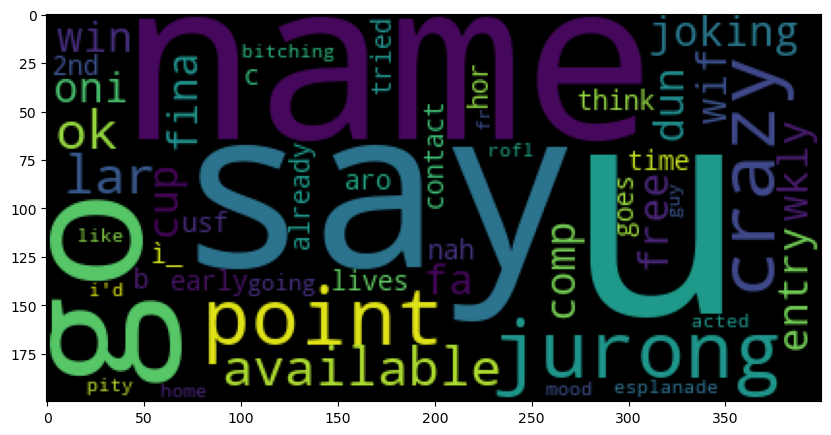

In [39]:
from wordcloud import WordCloud
cloud  = WordCloud(stopwords = stopwords.words("english"),max_words=50).generate(str(sp['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [40]:
# pip install WordCloud

## tdm (Term document Matrix)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer            ## (this is used to count each and every unique word)

In [42]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(sp["x"])

In [43]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [44]:
len(bow_transformer.vocabulary_)

## there are 9422unique words(after removing punctuations and stopwords)
## that when we create our tdm , our tdm have 9422 this many columns

9422

In [45]:
tdm=bow_transformer.transform(sp["x"])

In [46]:
tdm.shape

(6776, 9422)

In [47]:
type(tdm)

scipy.sparse._csr.csr_matrix

In [48]:
## tdm is like our x variables

## Sampling

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
tdm_train,tdm_test,train_y,test_y = train_test_split(tdm,sp["y"],test_size=.2)

## naive_bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [52]:
nb.fit(tdm_train,train_y)

MultinomialNB()

In [53]:
pred_nb=nb.predict(tdm_test)

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
tab_nb=confusion_matrix(test_y,pred_nb)
tab_nb

array([[1156,   14],
       [  15,  171]], dtype=int64)

In [56]:
tab_nb.diagonal().sum()/tab_nb.sum()*100

97.86135693215338

## DecisionTreeClassifier

In [128]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
dtc.fit(tdm_train,train_y)

DecisionTreeClassifier()

In [131]:
pred_test1=dtc.predict(tdm_test)
pred_train1=dtc.predict(tdm_train)

In [132]:
tab_dt=confusion_matrix(test_y,pred_test1)
tab_dt

array([[1159,   14],
       [  32,  151]], dtype=int64)

In [133]:
tab_dt.diagonal().sum()/tab_dt.sum()*100

96.60766961651917

## LogisticRegression

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
logreg = LogisticRegression()
logreg.fit(tdm_train,train_y)

LogisticRegression()

In [137]:
pred_train =logreg.predict(tdm_train)
pred_test= logreg.predict(tdm_test)

In [138]:
from sklearn.metrics import confusion_matrix

In [139]:
mat_test=confusion_matrix(test_y,pred_test)
mat_test

array([[1173,    0],
       [  23,  160]], dtype=int64)

In [141]:
mat_test.diagonal().sum()/mat_test.sum()*100

98.30383480825958

## Random forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200,criterion='entropy')


In [79]:
rfc.fit(tdm_train,train_y)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [80]:
pred_rfc= rfc.predict(tdm_test)

In [81]:
tab_rfc = confusion_matrix(pred_rfc,test_y)
tab_rfc

array([[1178,   25],
       [   0,  153]], dtype=int64)

In [405]:
tab_rfc_cr.diagonal().sum()/tab_rfc_cr.sum()*100

80.71065989847716

In [16]:
sp.head()

,y,x
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [5]:
sp=sp.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [8]:
sp.rename(columns={'v1':'y','v2':'x'},inplace=True)

In [12]:
sp.y.replace({'ham':0,'spam':1},inplace=True)

In [15]:
sp.x=sp.x.str.lower()

In [24]:
from nltk.corpus import stopwords

In [26]:
len(stopwords.words('english'))

179

In [46]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc="".join(nopunc)
    
    return [word for word in nopunc.split() if word not in stopwords.words('english')]

In [49]:
sp['x'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: x, Length: 6776, dtype: object

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(sp["x"])

In [52]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x000001B2F01CBB00>)

In [53]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [54]:
len(bow_transformer.vocabulary_)

9422

In [56]:
tdm=bow_transformer.transform(sp['x'])

In [58]:
tdm.shape

(6776, 9422)

In [59]:
type(tdm)

scipy.sparse._csr.csr_matrix

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
tdm_train,tdm_test,train_y,test_y=train_test_split(tdm,sp['y'],test_size=.2)

In [63]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [64]:
nb.fit(tdm_train,train_y)

MultinomialNB()

In [67]:
pred_nb=nb.predict(tdm_test)

In [68]:
pred_nb

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [66]:
from sklearn.metrics import confusion_matrix

In [69]:
tab_nb=confusion_matrix(test_y,pred_nb)

In [70]:
tab_nb

array([[1159,   19],
       [   6,  172]], dtype=int64)